<a href="https://colab.research.google.com/github/seoulartgirl/GithubPortfolio/blob/main/%E1%84%83%E1%85%B5%E1%86%B8%E1%84%85%E1%85%A5%E1%84%82%E1%85%B5%E1%86%BC08_CNN_04_%E1%84%89%E1%85%A1%E1%84%8C%E1%85%A5%E1%86%AB%E1%84%92%E1%85%AE%E1%86%AB%E1%84%85%E1%85%A7%E1%86%AB%E1%84%83%E1%85%AC%E1%86%AB%E1%84%86%E1%85%A9%E1%84%83%E1%85%A6%E1%86%AF%E1%84%92%E1%85%AA%E1%86%AF%E1%84%8B%E1%85%AD%E1%86%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 사전 훈련된 모델(pretrained model) 활용하기

#### 사전 훈련된 모델이란? (전이학습 - 이미 훈련된 모델)

- 대규모 이미지 분류 문제를 위해 대량의 데이터셋에서 미리 훈련된 모델
- 원본 데이터셋이 충분히 크고 일반적이라면 사전 훈련된 모델에 의해 학습된 특성의 계층 구조는 실제 일반적인 모델로 효율적인 역할을 할 수 있음
- 새로운 문제가 원래 작업과 완전히 다른 클래스에 대한 것이더라도 많은 컴퓨터 비전 문제에 유용함
    - 예. 대부분 동물이나 생활용품으로 이루어진 ImageNet 데이터셋에 모델을 훈련한 후 모델을 이미지에서 가구 아이템을 식별하는 용도로 사용 가능
    - ImageNet :  1400만개 레이블된 이미지와 1000개 클래스로 구성
- 사전 훈련된 모델 사례
    - VGG16
    - ResNet
    - Inception
    - Xception

#### 사전 훈련된 모델을 사용하는 방법

1. 특성 추출(feature extraction)
2. 미세 조정(fine tuning)

### 사전 훈련된 모델을 사용한 특성 추출

- 특성 추출이란
    사전에 학습된 모델의 표현을 사용하여 새로운 샘플에서 흥미로운 특성을 뽑아내는 것
- 합성곱 기반 층(합성곱과 풀링 층)을 선택하여 새로운 데이터를 통과시키고, 그 출력으로 새로운 분류기를 훈련

#### 합성곱 층만 재사용하는 이유
- 합성곱 층에 의해 학습된 표현이 일반적인어서 재사용 가능
- 컨브넷의 특성 맵은 이미지에 대한 일반적인 컨셉의 존재 여부를 기록한 맵으로 주어진 컴퓨터 비전 문제에 상관없이 유용하게 사용할 수 있음
- 분류기에서 학습한 표현은 모델이 훈련된 클래스 집합에 특화되어 있음
    - 분류기는 전체 사진에 어떤 클래스가 존재할 확률에 관한 정보만 담고 있음
    - 밀집 연결층에서 찾은 표현은 입력 이미지에 있는 객체의 위치정보를 가지고 있지 않음
- 합성곱의 특성 맵은 객체 위치를 고려함
- 특정 합성곱 층에서 추출한 표현의 일반성(과 재사용성) 수준은 모델에 있는 층의 깊이에 달려 있음
    - 모델의 하위 층은 (에지, 색깔, 질감 등) 지역적이고 매우 일반적인 특성 팹을 추출
    - 모델의 상위 층은 ('강아지 눈'이나 '고양이 귀'처럼) 좀 더 추상적인 개념을 추출
- 새로운 데이터 셋이 원본 모델이 훈련한 데이터셋과 많이 다르다면 전체 합성곱 기반 층을 사용하는 것보다는 모델의 하위 층 몇개만 특성 추출에 사용하는 것이 좋음

#### keras.applications 모듈에서 제공하는 이미지 분류 모델들

- Xception
- ResNet
- MobileNet
- EfficientNet
- DenseNet
- MobileNet
- 그 외

#### VGG16 네트워크의 합성곱 기반 층을 사용한 모델

- ImageNet 데이터셋에 훈련된 VGG16 네트워크의 합성곱 기반 층을 사용

In [ ]:
from tensorflow import keras

conv_base = keras.applications.vgg16.VGG16(weights='imagenet',
                                     include_top=False,
                                     input_shape=(180, 180, 3)) # 원하는 이미지의 크기 지정 컬러라서 3

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
conv_base.summary() # 총 다섯 블록 - 필터는 64, 128, ..., 512

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

**밀집연결층을 놓는 두 가지 방식**
- 방식1
    - 새로운 데이터셋에서 합성곱 기반 층을 실행하고 출력을 넘파이 배열로 디스크에 저장
    - 저장한 데이터를 독립된 밀집 연결 분류기에 입력으로 사용
    - 입력 이미지에 대해 합성곱 기반 층을 한번만 실행하므로 빠르고 비용이 적게 드나 데이터 증식을 할 수 없음
- 방식2
    - 준비한 모델 위에 Dense층을 쌓아 확장
    - 입력데이터에서 엔드-투-앤드로 전체 모델을 실행
    - 모델에 노출된 모든 입력 이미지가 매번 합성곱 기반층을 통과하므로 데이터 증식을 사용할 수 있으나 방식1보다 비용이 많이 듬

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os, shutil, pathlib
from keras.utils import image_dataset_from_directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/DeepLearning')
data_dir = pathlib.Path('data/cats_vs_dogs_small')
model_dir = pathlib.Path('model')

train_dir = base_path / data_dir / 'train'
validation_dir = base_path / data_dir / 'validation'
test_dir = base_path / data_dir / 'test'
print(train_dir)

train_ds = image_dataset_from_directory(train_dir, image_size=(180,180), batch_size=32)
validation_ds = image_dataset_from_directory(validation_dir, image_size=(180,180), batch_size=32)
test_ds = image_dataset_from_directory(test_dir, image_size=(180,180), batch_size=32)

/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/cats_vs_dogs_small/train
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


#### 데이터 증식을 사용하지 않는 빠른 특성 추출

- 훈련, 검증, 테스트 데이터셋에서 conv_base 모델의 predict() 메서드를 호출해서 numpy 배열로 빠른 특성 추출

In [ ]:
def get_features_and_labels(dataset):
    all_ftrs = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        ftrs = conv_base.predict(preprocessed_images)
        all_ftrs.append(ftrs)
        all_labels.append(labels)
    return np.concatenate(all_ftrs), np.concatenate(all_labels) #하나로 합쳐주기


In [ ]:
train_X, train_y = get_features_and_labels(train_ds)
val_X, val_y = get_features_and_labels(validation_ds)
test_X, test_y = get_features_and_labels(test_ds)

1/1 [==============================] - 0s 23ms/step


In [ ]:
train_X.shape, val_X.shape, test_X.shape

((2000, 5, 5, 512), (1000, 5, 5, 512), (2000, 5, 5, 512))

- 밀집 연결 분류기 정의하고 훈련하기

In [ ]:
# 모델 재구성
inputs = keras.Input(shape=(5, 5, 512))
x = keras.layers.Flatten()(inputs) # 펼치기
x = keras.layers.Dense(256)(x)
x = keras.layers.Dropout(0.5)(x) # 드롭아웃 50%
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

# 컴파일
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', # 이진
              metrics=['accuracy'])

# 콜백
base_path = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/DeepLearning')
model_dir = 'model'
model_name = 'Cat_Dog_VGG16_model1.keras'
chkpt = keras.callbacks.ModelCheckpoint(filepath = str(base_path / model_dir / model_name),
                                        save_best_only=True)

# 훈련
history = model.fit(train_X, train_y,
                    epochs=30,
                    batch_size=20,
                    validation_data=(val_X, val_y))

Epoch 1/30
100/100 [==============================] - 3s 6ms/step - loss: 22.0070 - accuracy: 0.9170 - val_loss: 9.0812 - val_accuracy: 0.9480
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 3.5527 - accuracy: 0.9740 - val_loss: 9.3152 - val_accuracy: 0.9530
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 2.2210 - accuracy: 0.9870 - val_loss: 5.7146 - val_accuracy: 0.9760
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 1.3022 - accuracy: 0.9905 - val_loss: 10.0450 - val_accuracy: 0.9550
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 1.2203 - accuracy: 0.9900 - val_loss: 4.2469 - val_accuracy: 0.9770
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.6598 - accuracy: 0.9940 - val_loss: 6.2815 - val_accuracy: 0.9770
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.5082 - accuracy: 0.9970 - val_loss: 5.4605 - val_accuracy: 0.9750
Epoc

In [ ]:
def draw_metric_plot2(history):
    loss = ['loss', 'val_loss']
    acc = ['accuracy', 'val_accuracy']
    title = ['Loss', 'Accuracy']
    plt.figure(figsize=(10,5))
    for i, item in enumerate([loss, acc]):
        n = len(history.history[item[0]])
        plt.subplot(1,2,i+1)
        plt.plot(history.history[item[0]], label='train')
        plt.plot(history.history[item[1]], label='validation')
        plt.xlabel('epoch')
        plt.ylabel(title[i])
        plt.xticks(range(n), range(1, n+1))
        plt.title(title[i] + ' plot')
        plt.legend()
    plt.show()
draw_metric_plot2(history)

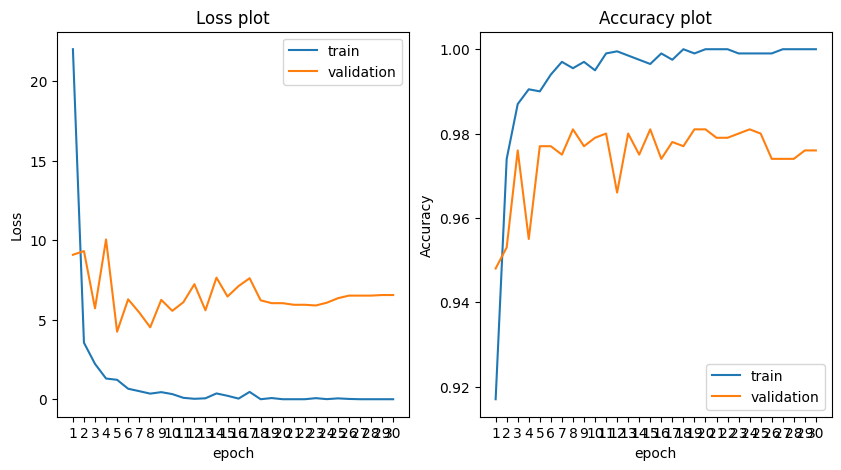

In [ ]:
draw_metric_plot2(history)

#### 데이터 증식을 사용한 특성 추출

conv_base와 새로운 밀집 분류기를 연결한 모델 생성 후 입력 데이터를 사용하여 엔드-투-엔드로 실행

**VGG16 합성곱 기반 층 동결(freezing)**
- 층을 동결하는 것은 훈련하는 동안 가중치가 업데이트 되지 않도록 막는 다는 것
- keras에서는 trainable 속성을 False로 설정하여 층이나 모델을 동결
    - 층이나 모델의 훈련 가능한 가중치 리스트가 비게 됨

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
#합성곱 기반의 층을 동결
conv_base.trainable = False

In [ ]:
len(conv_base.trainable_weights)

0

In [ ]:
# conv_base.trainable = True

In [ ]:
# conv_base.trainable_weights #len이 26개가 됨

**새로운 모델 생성**
1. 데이터 증식 단계
2. 동결된 합성곱 기반 층
3. 밀집 분류기

`이 기법은 연산비용이 크므로 GPU를 사용`

In [ ]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip('horizontal'),
        keras.layers.RandomRotation(0.1),
        keras.layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256)(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.summary() #동결해서 weight 수정 안함

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem (  (None, 180, 180, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 180, 180, 3)       0         
 )                                                               
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0   

In [ ]:
# 컴파일
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', # 이진
              metrics=['accuracy'])

# 콜백
base_path = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/'
model_dir = 'model/'
model_name2 = base_path + model_dir + 'Cat_Dog_VGG16_freezing_model2.h5'
chkpt = keras.callbacks.ModelCheckpoint(filepath = model_name2,
                                        save_best_only=True, monitor='val_loss')

In [ ]:
history2 = model.fit(train_ds, epochs=50,
                     validation_data=validation_ds,
                     callbacks=[chkpt])

Epoch 1/50
63/63 [==============================] - ETA: 0s - loss: 17.9146 - accuracy: 0.9065

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 13s 179ms/step - loss: 17.9146 - accuracy: 0.9065 - val_loss: 3.5876 - val_accuracy: 0.9660
Epoch 2/50
63/63 [==============================] - 7s 106ms/step - loss: 7.8144 - accuracy: 0.9395 - val_loss: 4.1852 - val_accuracy: 0.9680
Epoch 3/50
63/63 [==============================] - 7s 105ms/step - loss: 6.2912 - accuracy: 0.9455 - val_loss: 16.3990 - val_accuracy: 0.9400
Epoch 4/50
63/63 [==============================] - 7s 105ms/step - loss: 5.6795 - accuracy: 0.9560 - val_loss: 6.1839 - val_accuracy: 0.9750
Epoch 5/50
63/63 [==============================] - 7s 105ms/step - loss: 4.4388 - accuracy: 0.9675 - val_loss: 4.3434 - val_accuracy: 0.9770
Epoch 6/50
63/63 [==============================] - 7s 104ms/step - loss: 3.0170 - accuracy: 0.9715 - val_loss: 5.2701 - val_accuracy: 0.9720
Epoch 7/50
63/63 [==============================] - 7s 104ms/step - loss: 2.8980 - accuracy: 0.9690 - val_loss: 10.5187 - val_accuracy: 0.9540
Epoch 8/50
63

In [ ]:
best_epoch = np.argmin(history2.history['val_loss'])
best_epoch2 = np.argmax(history2.history['val_accuracy'])
#best epoch 숫자
print(f'loss: {best_epoch}, accuracy: {best_epoch2}')
print('## VGG16 데이터 증식 사용한 모델 훈련, 검증 데이터 성능')
print(f'epochs: {best_epoch+1}일때', end=' ')
for key in history2.history.keys():
    print(f'{key}: {history2.history[key][best_epoch+1]:.4f}', end=' ')
print()

loss: 48, accuracy: 20
## VGG16 데이터 증식 사용한 모델 훈련, 검증 데이터 성능
epochs: 49일때 loss: 0.7304 accuracy: 0.9895 val_loss: 0.9099 val_accuracy: 0.9800 


In [ ]:
test_model = keras.models.load_model(model_name2)
test_loss, test_acc = test_model.evaluate(test_ds)
print('## VGG16 데이터 증식 사용한 모델 테스트 결과')
print(f'테스트 정확도: {test_acc:.4f}, 손실: {test_loss:.4f}')

63/63 [==============================] - 5s 64ms/step - loss: 2.3777 - accuracy: 0.9745
## VGG16 데이터 증식 사용한 모델 테스트 결과
테스트 정확도: 0.9745, 손실: 2.3777


### 사전 훈련된 모델 미세 조정하기

- 모델을 재사용하는 기법 중 하나로서 특성추출을 보완하는 미세조정(fine tuning)
- 미세 조정은 특성 추출에 사용했던 동결 모델의 상위 층 몇개를 동결에서 해제하고 모델에 새로 추가한 츨(밀집연결분류기)과 함께 훈련하는 것
- 주어진 문제에 조금 더 밀접하게 재사용 모델의 표현을 일부 조정하기 때문에 미세조정이라고 부름
- 미세 조정 단계
    1. 사전에 훈련된 기반 네트워크 위에 새로운 네트워크를 추가
    2. 기반 네트워크를 동결
    3. 새로 추가한 네트워크를 훈련
    4. 기반 네트워크에서 일부 층의 동결을 해제(배치 정규화 층은 동결해제하면 안됨)
    5. 동결을 해제한 층과 새로 추가한 층을 함께 훈련

전체 합성곱 기반 층을 미세조정하지 않는 이유
- 합성곱 하위 층들은 좀 더 일반적이고 재사용 가능한 특성들을 인코딩. 새로운 문제에 재활용하도록 수정이 필요한 것은 구체적인 특성이므로 이를 미세조정하는 것이 유리함. 하위 층으로 갈수록 미세조정에 대한 효과가 감소함
- 훈련해야 할 파라미터가 많을수록 과대적합의 위험이 커짐
- 합성곱 기반 층에서 최상위 2~3개 층만 미세조정하는 것이 좋음

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

모델 미세 조정하기

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256)(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model2 = keras.Model(inputs, outputs)

In [ ]:
#모델 컴파일
model2.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])
base_model_path = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/model/'
model_name3 = base_model_path + 'Cat_Dog_VGG16_fineTuning_model.h5'

chkpt = keras.callbacks.ModelCheckpoint(filepath = model_name3,
                                        save_best_only=True, monitor='val_loss')

history3 = model.fit(train_ds, epochs=30,
                     validation_data=validation_ds,
                     callbacks=[chkpt])

Epoch 1/30
62/63 [============================>.] - ETA: 0s - loss: 0.5902 - accuracy: 0.9894

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 7s 107ms/step - loss: 0.5855 - accuracy: 0.9895 - val_loss: 1.4452 - val_accuracy: 0.9780
Epoch 2/30
63/63 [==============================] - 7s 105ms/step - loss: 0.4434 - accuracy: 0.9900 - val_loss: 1.5713 - val_accuracy: 0.9760
Epoch 3/30
63/63 [==============================] - 7s 109ms/step - loss: 0.3828 - accuracy: 0.9920 - val_loss: 1.3025 - val_accuracy: 0.9820
Epoch 4/30
63/63 [==============================] - 7s 104ms/step - loss: 0.4577 - accuracy: 0.9885 - val_loss: 1.8626 - val_accuracy: 0.9790
Epoch 5/30
63/63 [==============================] - 7s 105ms/step - loss: 0.6606 - accuracy: 0.9870 - val_loss: 3.1757 - val_accuracy: 0.9740
Epoch 6/30
63/63 [==============================] - 7s 104ms/step - loss: 0.4030 - accuracy: 0.9895 - val_loss: 2.6184 - val_accuracy: 0.9770
Epoch 7/30
63/63 [==============================] - 7s 104ms/step - loss: 0.4579 - accuracy: 0.9915 - val_loss: 1.4291 - val_accuracy: 0.9800
Epoch 8/30
63/63 

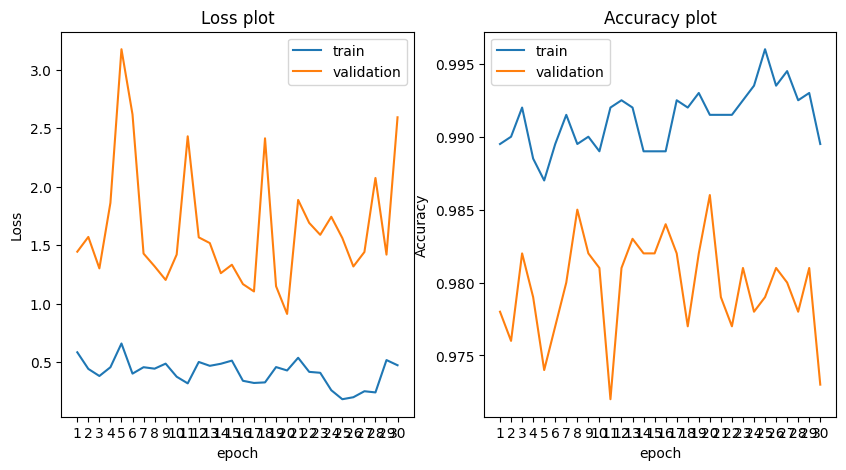

In [ ]:
draw_metric_plot2(history3)

In [ ]:
best_epoch = np.argmin(history3.history['val_loss'])
best_epoch2 = np.argmax(history3.history['val_accuracy'])
print(f'loss: {best_epoch}, accuracy: {best_epoch2}')
print('## VGG16 미세조정한 모델 훈련, 검증 데이터 성능')
print(f'epochs: {best_epoch+1}일때', end=' ')
for key in history2.history.keys():
    print(f'{key}: {history2.history[key][best_epoch]:.4f}', end=' ')
print()

loss: 19, accuracy: 19
## VGG16 미세조정한 모델 훈련, 검증 데이터 성능
epochs: 20일때 loss: 1.1612 accuracy: 0.9830 val_loss: 2.7261 val_accuracy: 0.9760 


In [ ]:
test_model3 = keras.models.load_model(model_name3)
test_loss, test_acc = test_model3.evaluate(test_ds)
print('## VGG16 미세조정한 모델 테스트 결과')
print(f'테스트 정확도: {test_acc:.4f}, 손실: {test_loss:.4f}')

63/63 [==============================] - 5s 64ms/step - loss: 1.9821 - accuracy: 0.9765
## VGG16 미세조정한 모델 테스트 결과
테스트 정확도: 0.9765, 손실: 1.9821


#### VGG16 데이터 증식 사용한 모델 테스트 결과
- 테스트 정확도: 0.9745, 손실: 2.3777

#### VGG16 미세조정한 모델 훈련, 검증 데이터 성능
- epochs: 20일때 loss: 1.1612 accuracy: 0.9830 val_loss: 2.7261 val_accuracy: 0.9760

#### VGG16 미세조정한 모델 테스트 결과
- 테스트 정확도: 0.9765, 손실: 1.9821

----